# Missing Value Imputation

In `lecture` 08 we delete the missing value row and column. In missing value we don't delete the row and columns.
In missing value imputation we will measure of central tendency (Mean, Midian & Mode)

`We use mode when we have categorial data: Lecture 05`
<br>
`We use mean and midian when we have numerical data`

[VideoLink](https://www.youtube.com/watch?v=nhnLdZeKlZk&list=PLfP3JxW-T70GR0w3zVzG7tgIFI14FZxaj&index=9&ab_channel=IndianAIProduction)


In [1]:
#import necessary modules
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data_set_url = r"dataSet/Hourse_Prices/train.csv"
df = pd.read_csv(data_set_url)

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
df.shape

(1460, 81)

In [5]:
df.tail(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#remove the value where null is present more than 20%

percentage = (df.isnull().sum()/ df.shape[0])*100
percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
reday_for_delete = percentage[percentage >20].keys()
reday_for_delete

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
#now drop this where null value is greater than > 20%
df2 = df.drop(columns=reday_for_delete)
print(f"before : {df.shape}")
print(f"after : {df2.shape}")

before : (1460, 81)
after : (1460, 76)


<Axes: >

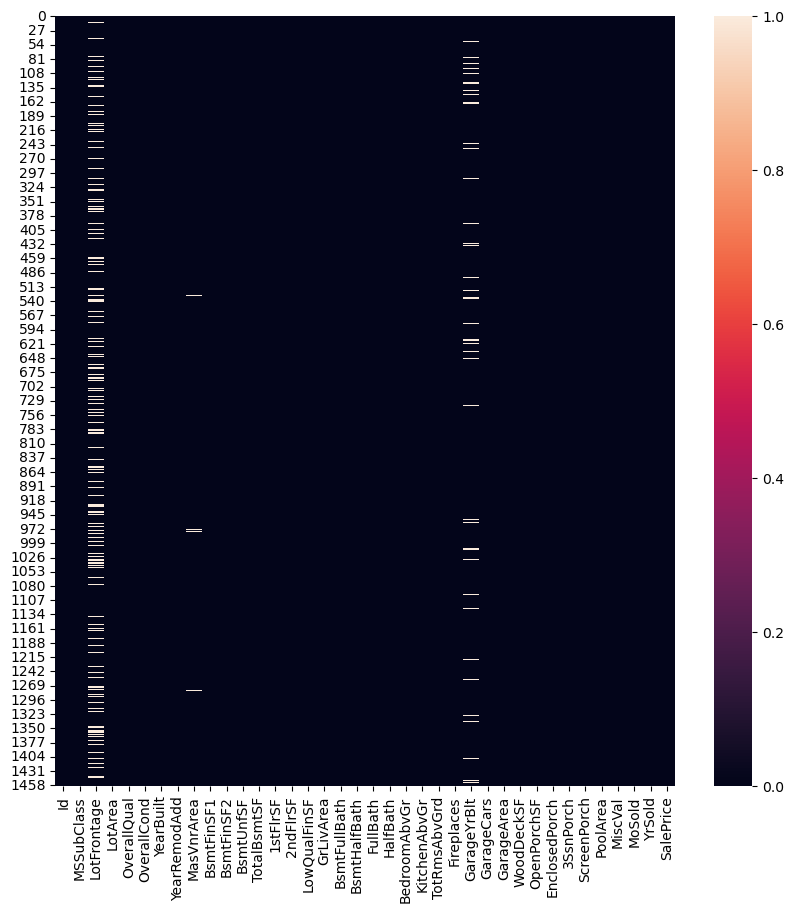

In [10]:

numarical_dtype = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,10))
sns.heatmap(numarical_dtype.isnull())

In [11]:
numarical_dtype.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [12]:
null_column = [var for var in numarical_dtype.columns if numarical_dtype[var].isnull().sum()>0]
null_column

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

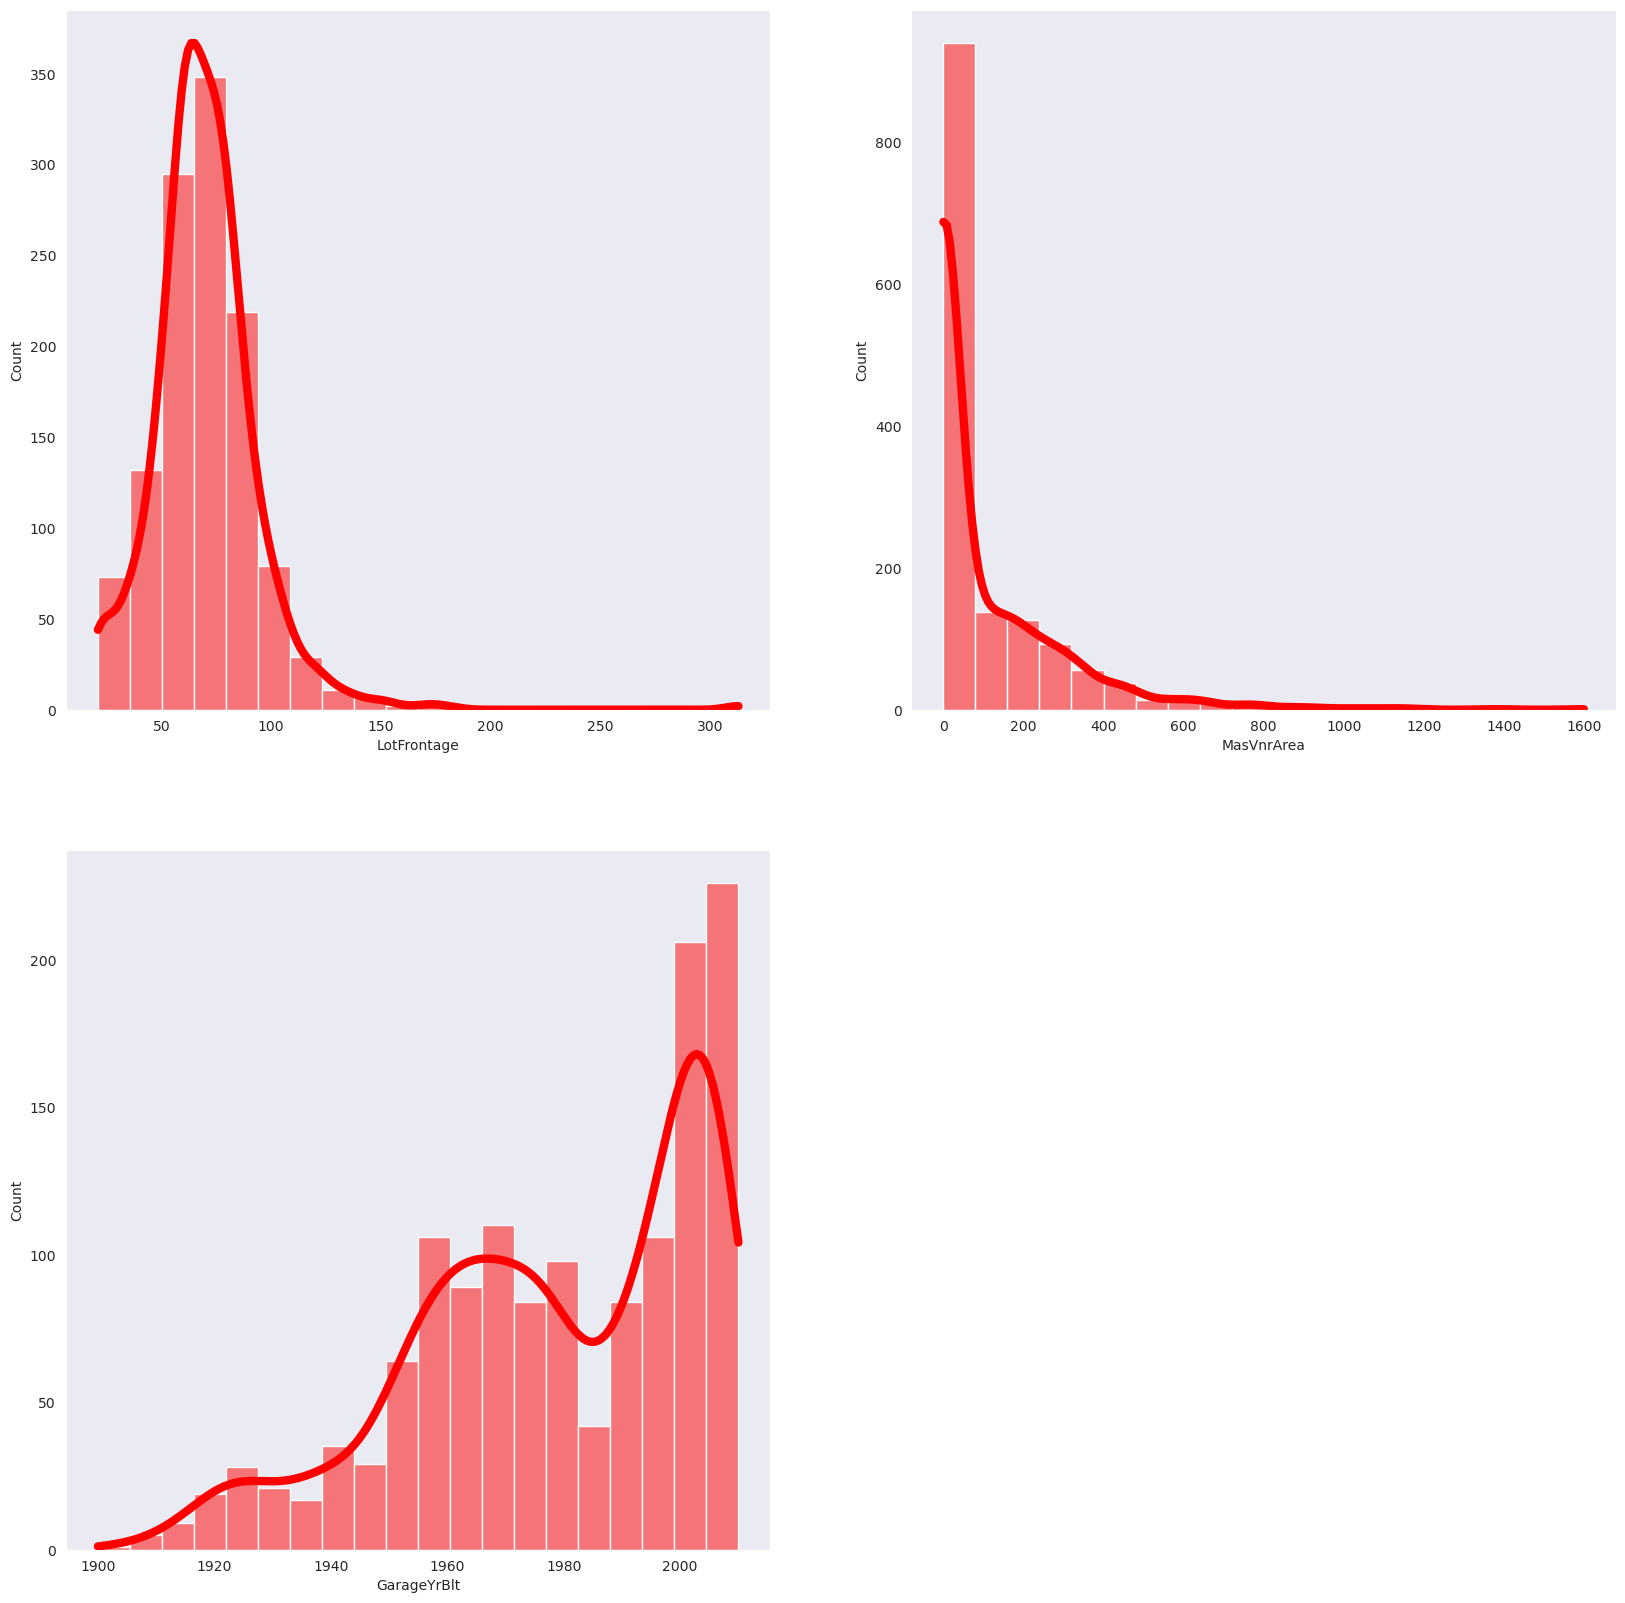

In [22]:
plt.figure(figsize=(20, 20))
for i, var in enumerate(null_column):
    plt.subplot(2, 2, i+1)
    sns.histplot(df2[var], kde=True, bins=20, line_kws={'linewidth': 6},color='r')

In [14]:
#fill the NaN value with mean value
df3 = numarical_dtype.fillna(df2.mean())
df3.isnull().sum().sum()

/tmp/ipykernel_3863/130852768.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3 = numarical_dtype.fillna(df2.mean())


0

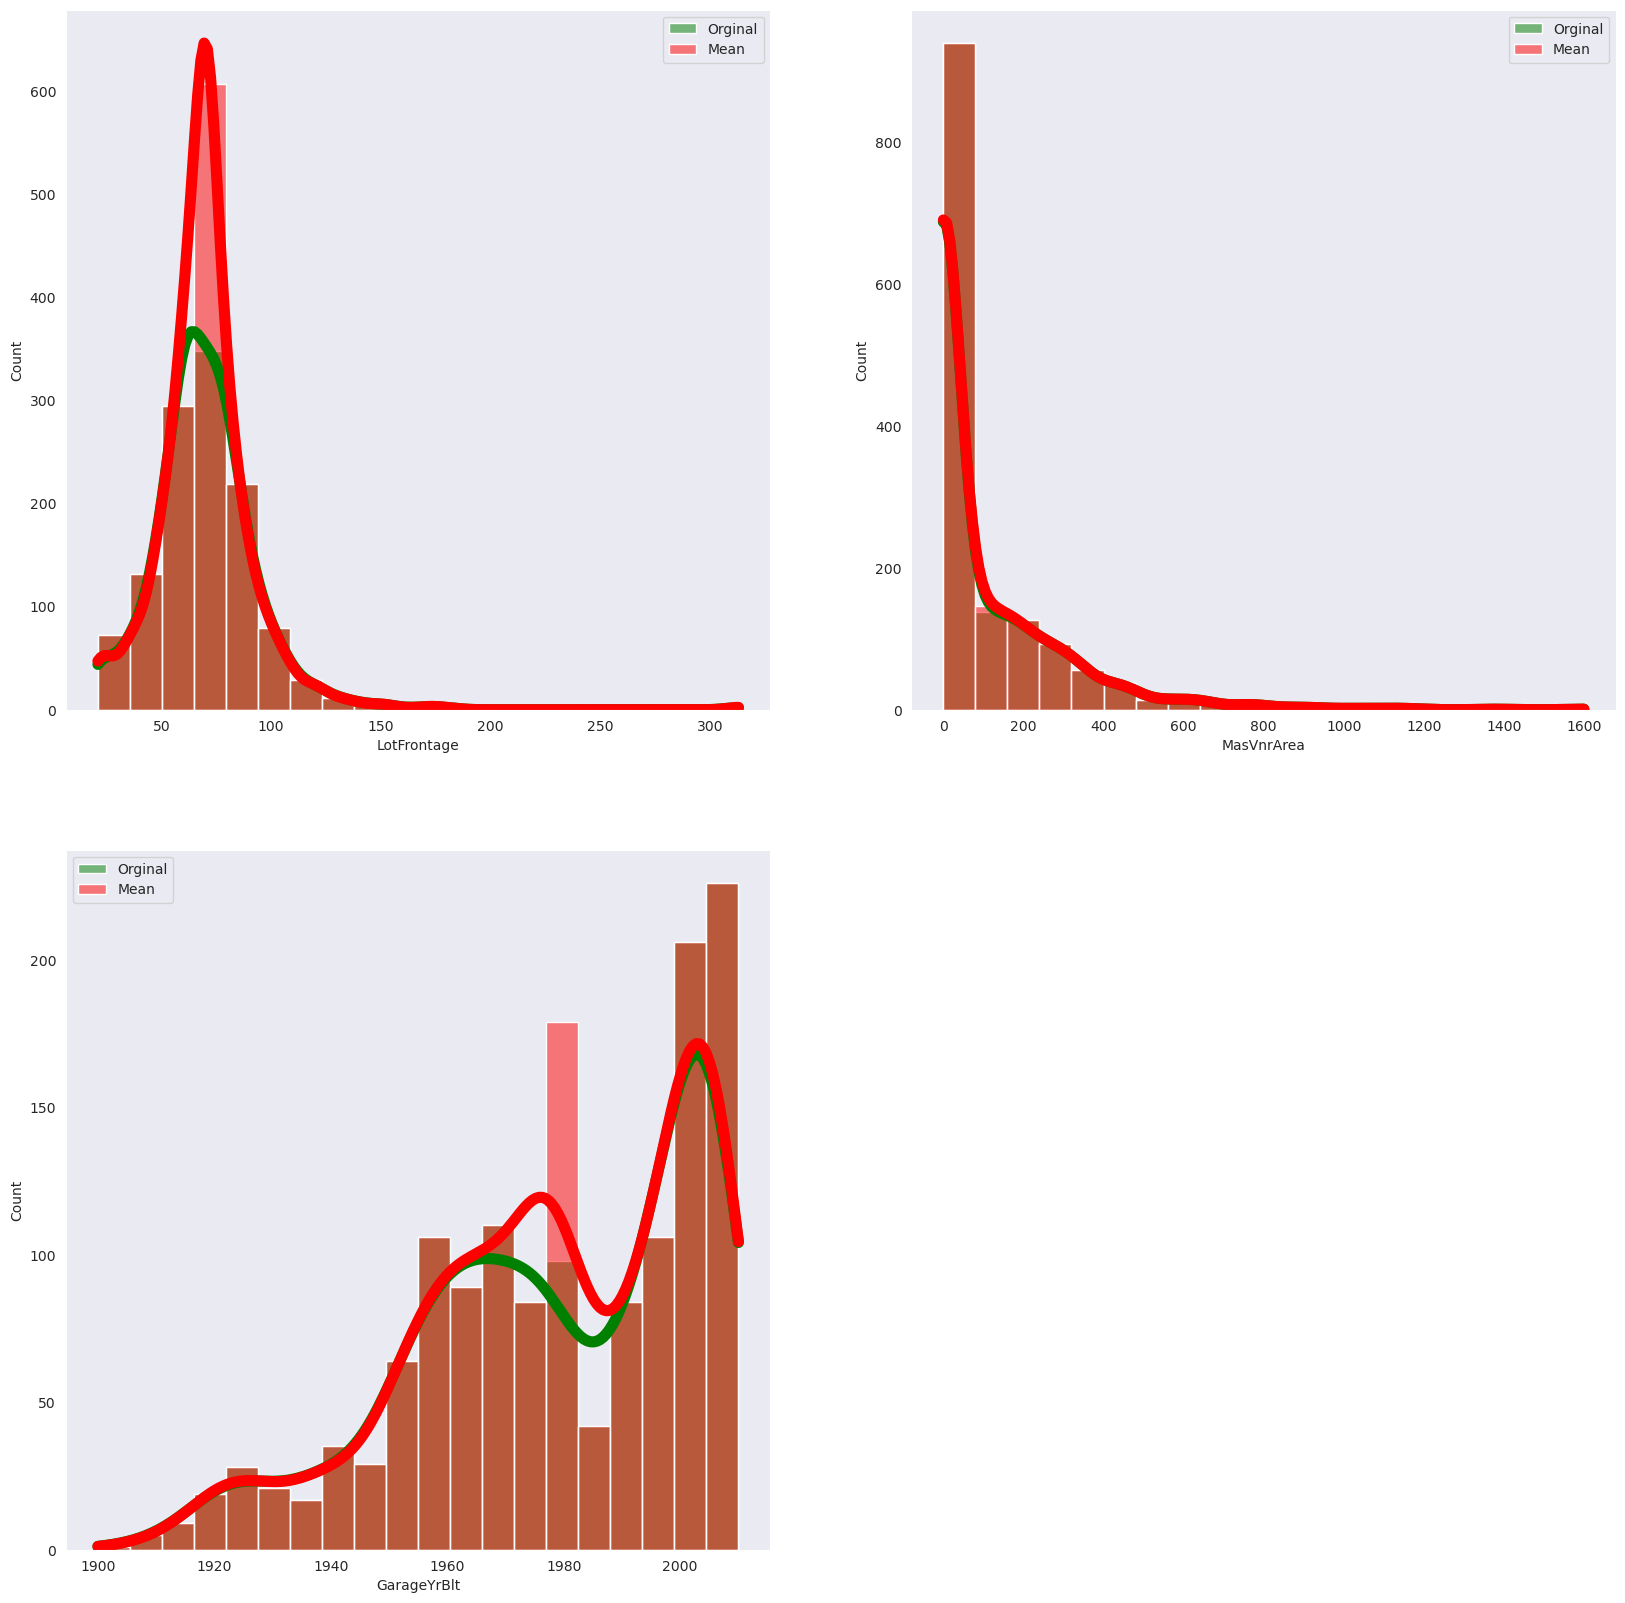

In [15]:
sns.set_style('dark')
plt.figure(figsize=(20, 20))
for i, var in enumerate(null_column):
    plt.subplot(2, 2, i+1)
    sns.histplot(numarical_dtype[var],kde=True,bins=20,line_kws={'linewidth':8},color='g',label="Orginal")
    sns.histplot(df3[var], kde=True, bins=20, line_kws={'linewidth': 8},color='r',label="Mean")
    plt.legend()

### Now Insted Of Mean We Use Median And See The Diffenence

In [16]:
df4 = numarical_dtype.fillna(numarical_dtype.median())
df4.isnull().sum().sum()

0

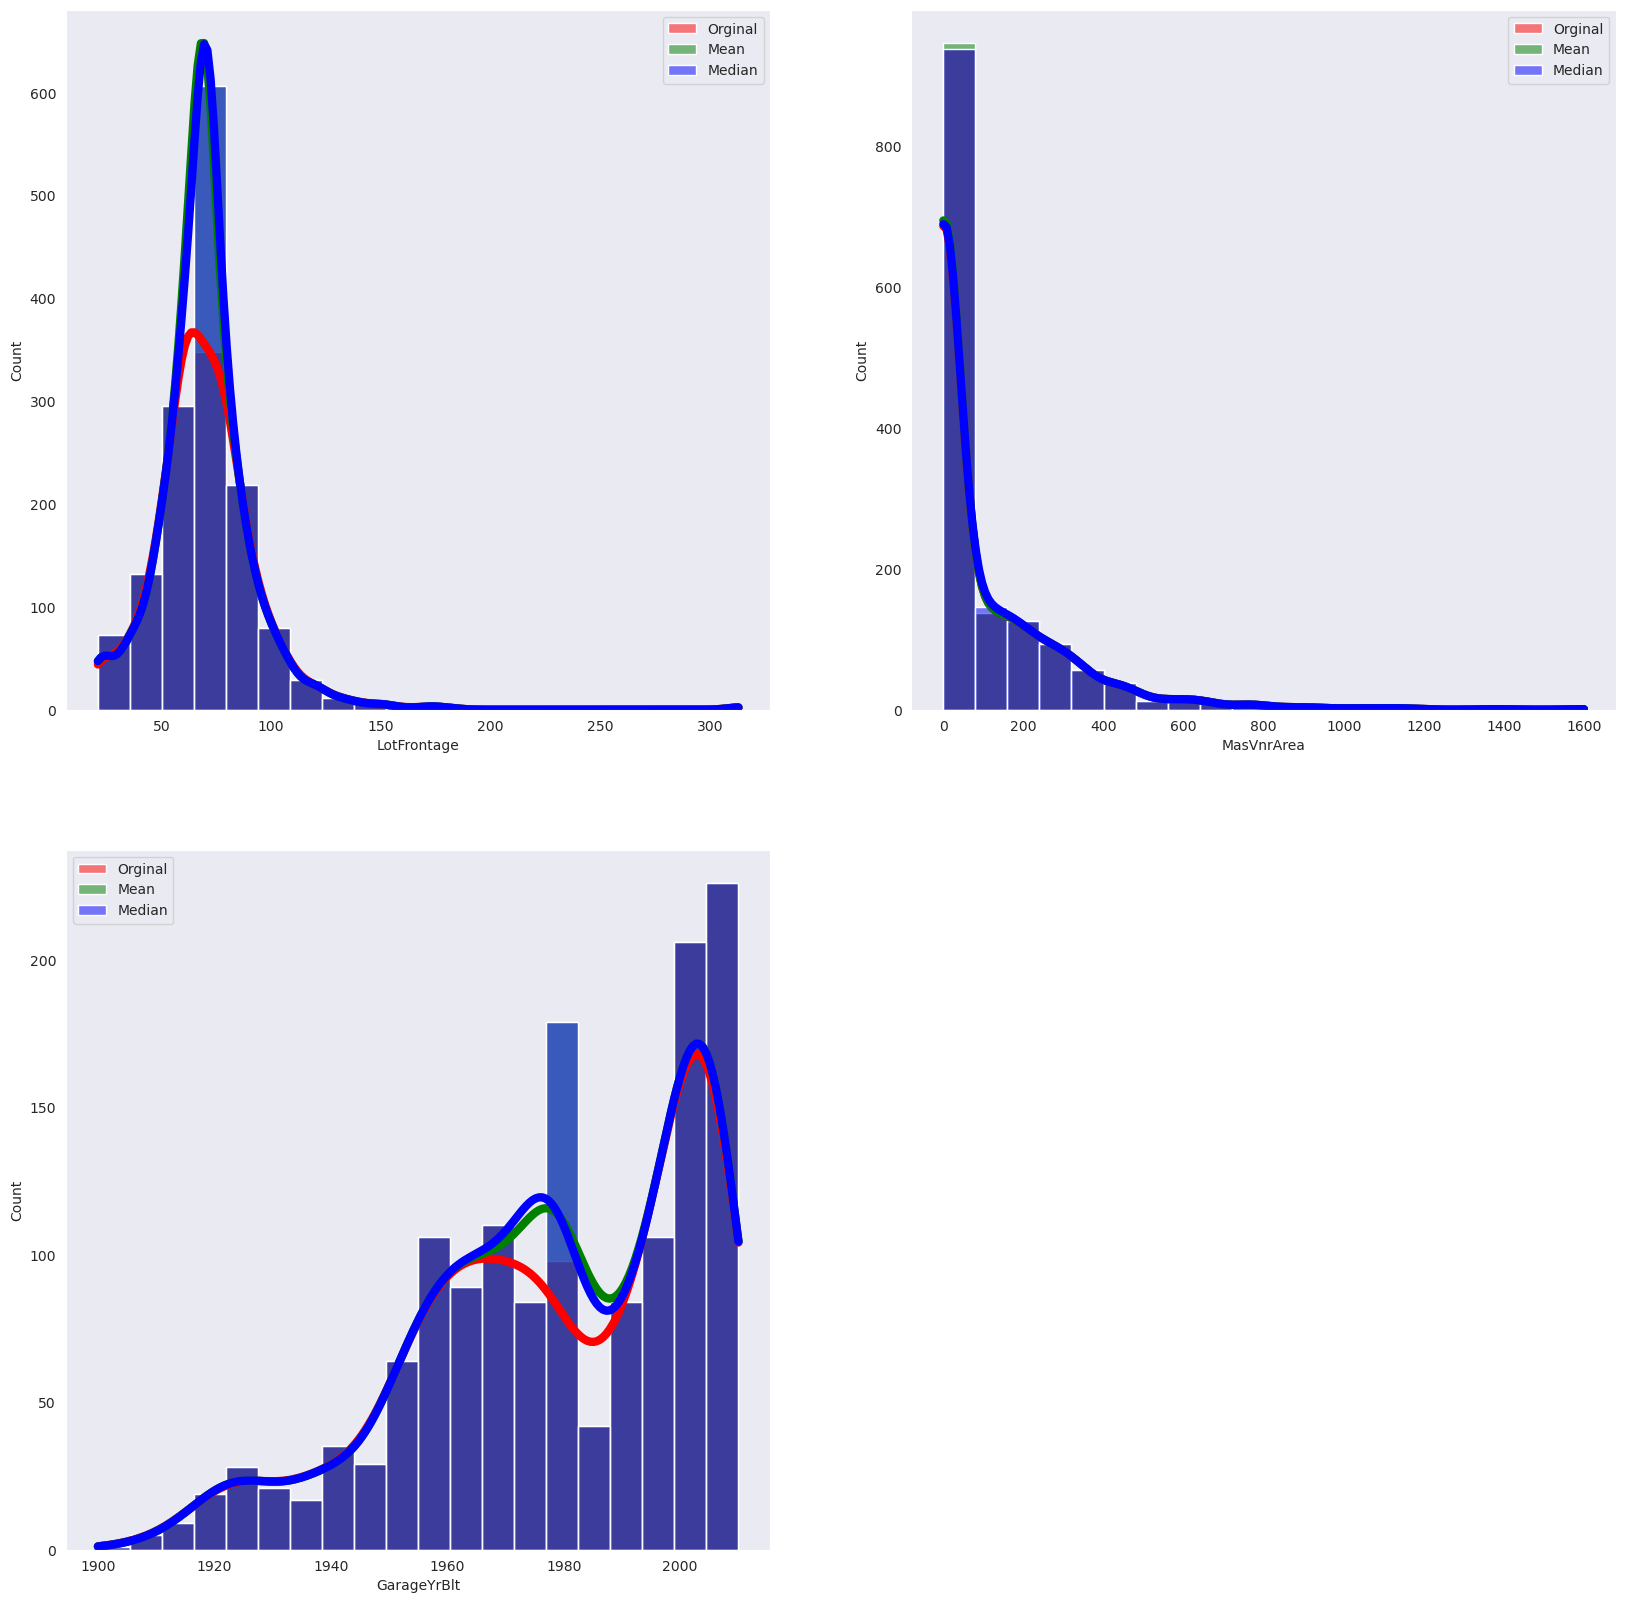

In [17]:
plt.figure(figsize=(20,20))
#sns.set_style("dark")
for i,var in enumerate(null_column):
    
    plt.subplot(2,2,i+1)

    
    sns.histplot(numarical_dtype[var],kde=True,line_kws={'linewidth':6},color='r',bins=20,label="Orginal")
    sns.histplot(df4[var],kde=True,line_kws={'linewidth':6},color='g',bins=20,label="Mean")
    sns.histplot(df3[var],kde=True,line_kws={'linewidth':6},color='b',bins=20,label="Median")
    plt.legend()

### Now we will see the outerlayer of the data by the help of boxplot

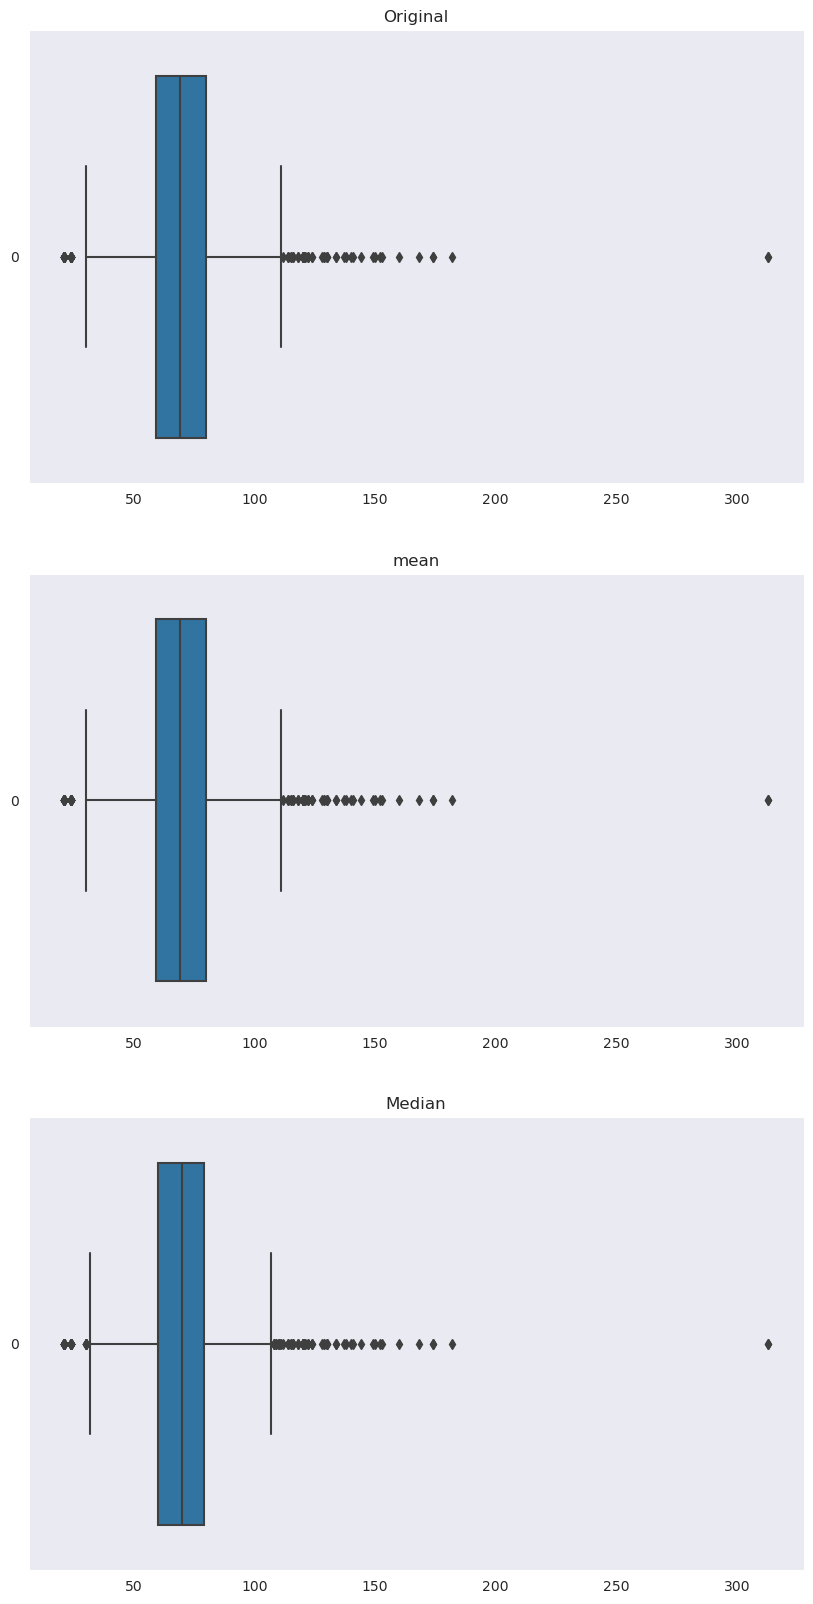

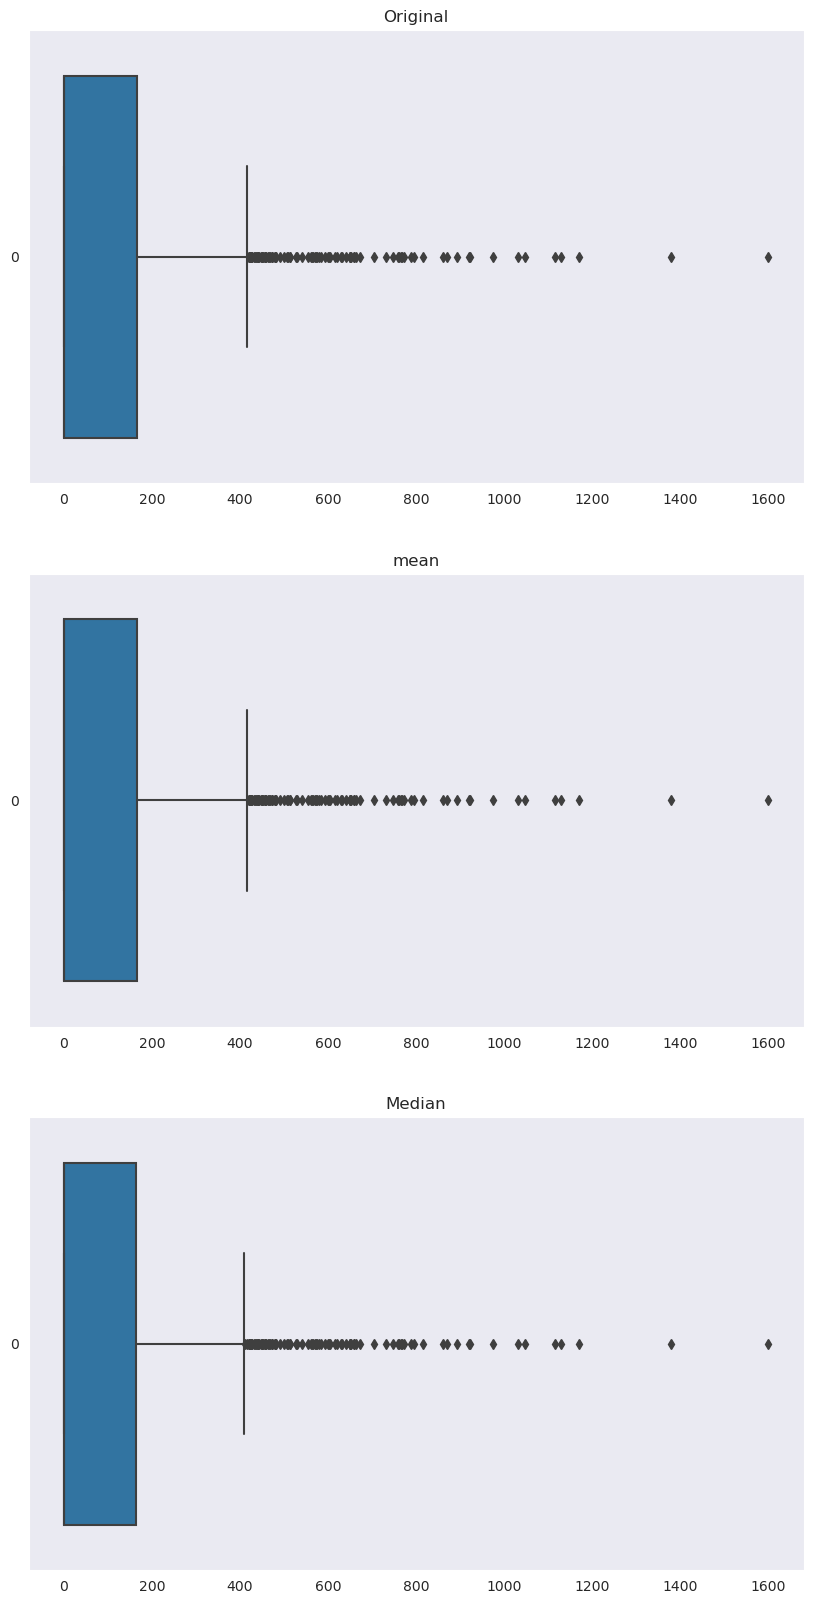

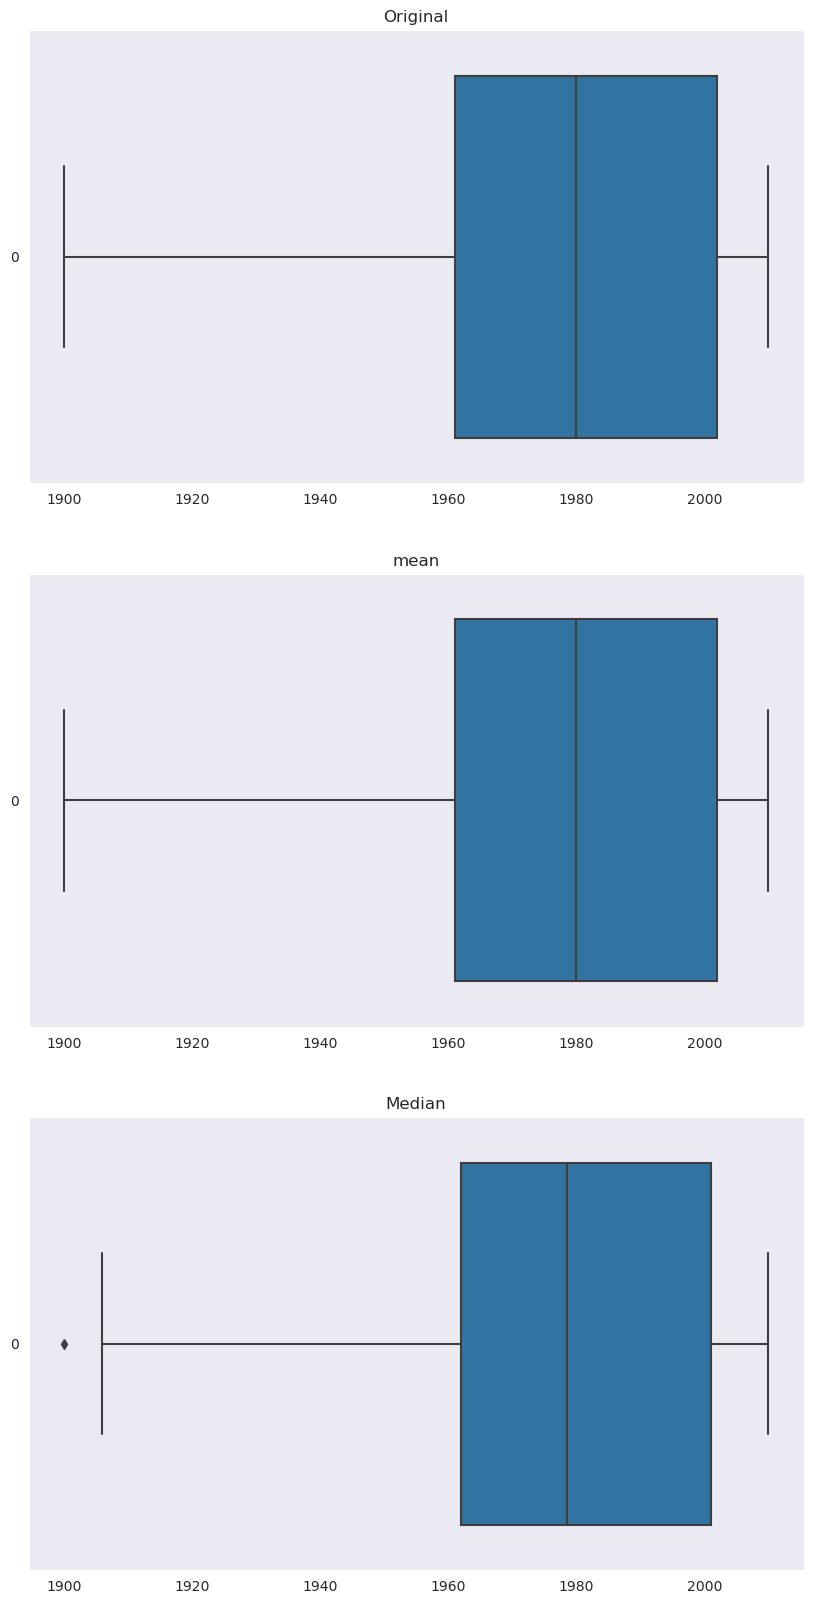

In [18]:
#If we have more out layer those data is not good for to train a machine.

for i, var in enumerate(null_column):
    
    plt.figure(figsize=(10,20))

    plt.subplot(3,1,1)
    plt.title("Original")
    sns.boxplot(df[var],orient='h')

    plt.subplot(3,1,2)
    plt.title("mean")
    sns.boxplot(df2[var],orient='h')

    plt.subplot(3,1,3)
    plt.title("Median")
    sns.boxplot(df3[var],orient='h')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Outliers: 
If we have more outliers this types of data is not good for machine learning.
<br>
To make a good ml model we should remove outliers of data. In our future video we will learn about how to reduce outliers of data.

#### `Compare all the dataset those have in orginal dataset null value, then mean, then median`

In [19]:
df_concate = pd.concat([numarical_dtype[null_column],df3[null_column],df4[null_column]],axis=1,keys=['Original','Mean','Median'])

In [20]:
# Show only null values
df_concate[df_concate.isnull().any(axis=1)]

Original                               Mean                           \
     LotFrontage MasVnrArea GarageYrBlt LotFrontage  MasVnrArea  GarageYrBlt   
7            NaN      240.0      1973.0   70.049958  240.000000  1973.000000   
12           NaN        0.0      1962.0   70.049958    0.000000  1962.000000   
14           NaN      212.0      1960.0   70.049958  212.000000  1960.000000   
16           NaN      180.0      1970.0   70.049958  180.000000  1970.000000   
24           NaN        0.0      1968.0   70.049958    0.000000  1968.000000   
31           NaN        0.0      1966.0   70.049958    0.000000  1966.000000   
39          65.0        0.0         NaN   65.000000    0.000000  1978.506164   
42           NaN        0.0      1983.0   70.049958    0.000000  1983.000000   
43           NaN        0.0      1977.0   70.049958    0.000000  1977.000000   
48          33.0        0.0         NaN   33.000000    0.000000  1978.506164   
50           NaN        0.0      1997.0   70.049958    0.000000  1997.000000   
64           NaN      573.0      1998.0   70.049958  573.000000  1998.000000   
66           NaN      287.0      1970.0   70.049958  287.000000  1970.000000   
76           NaN        0.0      1956.0   70.049958    0.000000  1956.000000   
78          72.0        0.0         NaN   72.000000    0.000000  1978.506164   
84           NaN       22.0      1995.0   70.049958   22.000000  1995.000000   
88         105.0        0.0         NaN  105.000000    0.000000  1978.506164   
89          60.0        0.0         NaN   60.000000    0.000000  1978.506164   
95           NaN       68.0      1993.0   70.049958   68.000000  1993.000000   
99          77.0        0.0         NaN   77.000000    0.000000  1978.506164   
100          NaN       28.0      1977.0   70.049958   28.000000  1977.000000   
104          NaN      600.0      1951.0   70.049958  600.000000  1951.000000   
108         85.0        0.0         NaN   85.000000    0.000000  1978.506164   
111          NaN        0.0      2000.0   70.049958    0.000000  2000.000000   
113          NaN      184.0      1953.0   70.049958  184.000000  1953.000000   
116          NaN      116.0      1962.0   70.049958  116.000000  1962.000000   
120          NaN        0.0      1969.0   70.049958    0.000000  1969.000000   
125         60.0        0.0         NaN   60.000000    0.000000  1978.506164   
126          NaN        0.0      1977.0   70.049958    0.000000  1977.000000   
127         55.0        0.0         NaN   55.000000    0.000000  1978.506164   
131          NaN       40.0      2000.0   70.049958   40.000000  2000.000000   
133          NaN      136.0      2001.0   70.049958  136.000000  2001.000000   
136          NaN      196.0      1967.0   70.049958  196.000000  1967.000000   
140         70.0        0.0         NaN   70.000000    0.000000  1978.506164   
147          NaN      180.0      2001.0   70.049958  180.000000  2001.000000   
148         63.0      120.0         NaN   63.000000  120.000000  1978.506164   
149          NaN        0.0      1936.0   70.049958    0.000000  1936.000000   
152          NaN      252.0      1971.0   70.049958  252.000000  1971.000000   
153          NaN        0.0      1960.0   70.049958    0.000000  1960.000000   
155         60.0        0.0         NaN   60.000000    0.000000  1978.506164   
160          NaN        0.0      1984.0   70.049958    0.000000  1984.000000   
163         55.0        0.0         NaN   55.000000    0.000000  1978.506164   
165         62.0        0.0         NaN   62.000000    0.000000  1978.506164   
166          NaN        0.0      1955.0   70.049958    0.000000  1955.000000   
169          NaN      653.0      1981.0   70.049958  653.000000  1981.000000   
170          NaN        0.0      1991.0   70.049958    0.000000  1991.000000   
177          NaN        0.0      1958.0   70.049958    0.000000  1958.000000   
180          NaN      456.0      2000.0   70.049958  456.000000  2000.000000   
186     